In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Libraries Imported')

Libraries Imported


In [ ]:
#importing datasets
Accidents= pd.read_csv('Accidents0515.csv',index_col='Accident_Index')
Casualities=pd.read_csv('Casualties0515.csv',error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
Vehicles=pd.read_csv('Casualties0515.csv',error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
print('Datasets Imported')

Datasets Imported


### Accidents dataset:

In [ ]:
Accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680,178240,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3.0,3218.0,6.0,30.0,0.0,-1.0,-1.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849
200501BS00002,524170,181650,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4.0,450.0,3.0,30.0,6.0,2.0,5.0,0.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909
200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5.0,0.0,6.0,30.0,0.0,-1.0,-1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857
200501BS00004,526900,177530,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3.0,3220.0,6.0,30.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840
200501BS00005,528060,179040,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6.0,0.0,6.0,30.0,0.0,-1.0,-1.0,0.0,0.0,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863


### Analyzing the dataset:

In [ ]:
Accidents.shape

(7717, 31)

In [ ]:
Accidents.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [ ]:
#dropping unwanted columns:
Accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class','Did_Police_Officer_Attend_Scene_of_Accident'], axis=1, inplace=True)

In [ ]:
Accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7717 entries, 200501BS00001 to 200501JI40696
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Longitude                                7717 non-null   float64
 1   Latitude                                 7717 non-null   float64
 2   Police_Force                             7717 non-null   int64  
 3   Accident_Severity                        7717 non-null   int64  
 4   Number_of_Vehicles                       7717 non-null   int64  
 5   Number_of_Casualties                     7717 non-null   int64  
 6   Date                                     7717 non-null   object 
 7   Day_of_Week                              7717 non-null   int64  
 8   Time                                     7717 non-null   object 
 9   Local_Authority_(District)               7717 non-null   int64  
 10  Local_Authority_(Highway)       

In [ ]:
#checking for any null values
Accidents.isnull().sum()

Longitude                                  0
Latitude                                   0
Police_Force                               0
Accident_Severity                          0
Number_of_Vehicles                         0
Number_of_Casualties                       0
Date                                       0
Day_of_Week                                0
Time                                       0
Local_Authority_(District)                 0
Local_Authority_(Highway)                  0
1st_Road_Class                             1
1st_Road_Number                            1
Road_Type                                  1
Speed_limit                                1
Junction_Detail                            1
2nd_Road_Number                            1
Pedestrian_Crossing-Human_Control          1
Pedestrian_Crossing-Physical_Facilities    1
Light_Conditions                           1
Weather_Conditions                         1
Road_Surface_Conditions                    1
Special_Co

In [ ]:
#dropping all rows that contains null values in it:
#Here dropping null rows doesn't affect the processing: 
Accidents=Accidents.dropna()
Accidents.shape

(7716, 25)

### Casualities Dataset:

In [ ]:
Casualities.head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1.0,1.0,3.0,1.0,37.0,7.0,2.0,1.0,1.0,0.0,0.0,-1.0,0.0,1.0
200501BS00002,1.0,1.0,2.0,1.0,37.0,7.0,3.0,0.0,0.0,0.0,4.0,-1.0,11.0,1.0
200501BS00003,2.0,1.0,1.0,1.0,62.0,9.0,3.0,0.0,0.0,0.0,0.0,-1.0,9.0,1.0
200501BS00004,1.0,1.0,3.0,1.0,30.0,6.0,3.0,5.0,2.0,0.0,0.0,-1.0,0.0,1.0
200501BS00005,1.0,1.0,1.0,1.0,49.0,8.0,3.0,0.0,0.0,0.0,0.0,-1.0,3.0,-1.0


In [ ]:
Casualities.isnull().sum()

Vehicle_Reference                     1
Casualty_Reference                    1
Casualty_Class                        1
Sex_of_Casualty                       1
Age_of_Casualty                       1
Age_Band_of_Casualty                  1
Casualty_Severity                     1
Pedestrian_Location                   1
Pedestrian_Movement                   1
Car_Passenger                         1
Bus_or_Coach_Passenger                1
Pedestrian_Road_Maintenance_Worker    1
Casualty_Type                         1
Casualty_Home_Area_Type               1
dtype: int64

In [ ]:
Casualities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92433 entries, 200501BS00001 to 20
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Vehicle_Reference                   92432 non-null  float64
 1   Casualty_Reference                  92432 non-null  float64
 2   Casualty_Class                      92432 non-null  float64
 3   Sex_of_Casualty                     92432 non-null  float64
 4   Age_of_Casualty                     92432 non-null  float64
 5   Age_Band_of_Casualty                92432 non-null  float64
 6   Casualty_Severity                   92432 non-null  float64
 7   Pedestrian_Location                 92432 non-null  float64
 8   Pedestrian_Movement                 92432 non-null  float64
 9   Car_Passenger                       92432 non-null  float64
 10  Bus_or_Coach_Passenger              92432 non-null  float64
 11  Pedestrian_Road_Maintenance_Worker  9

In [ ]:
Casualities.shape

(92433, 14)

In [ ]:
Casualities.columns

Index(['Vehicle_Reference', 'Casualty_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

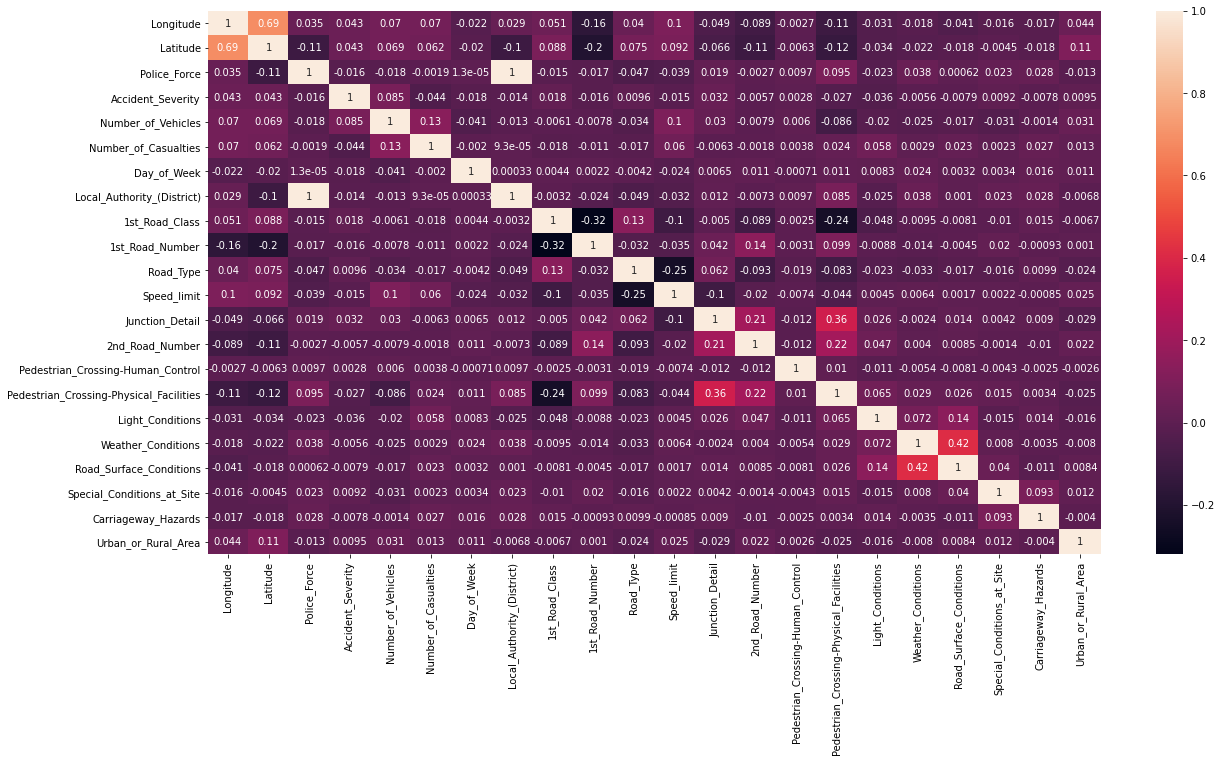

In [ ]:
Correlation = Accidents.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Correlation, annot=True)

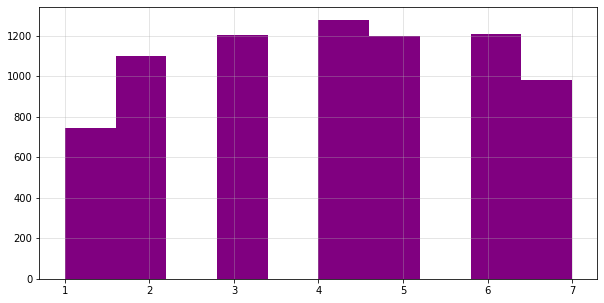

In [ ]:
#Distribution of accients based on week:
plt.figure(figsize=(10,5))
Accidents['Day_of_Week'].hist(color='purple')
plt.grid(alpha=0.4)

### Accident Severity distribution based on Road type : 

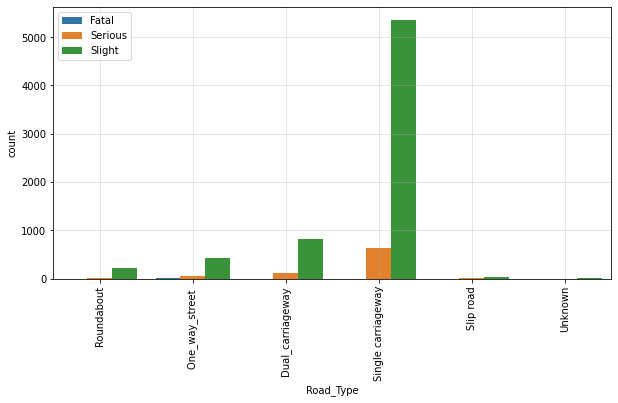

In [ ]:
#Accidents severity based on road type:
plt.figure(figsize=(10,5))
ax=sns.countplot('Road_Type',hue='Accident_Severity',data=Accidents)
ax.set_xticklabels(['Roundabout','One_way_street ','Dual_carriageway','Single carriageway','Slip road','Unknown'])
plt.xticks(rotation=90)
plt.legend(['Fatal','Serious','Slight'])
plt.grid(alpha=0.4)

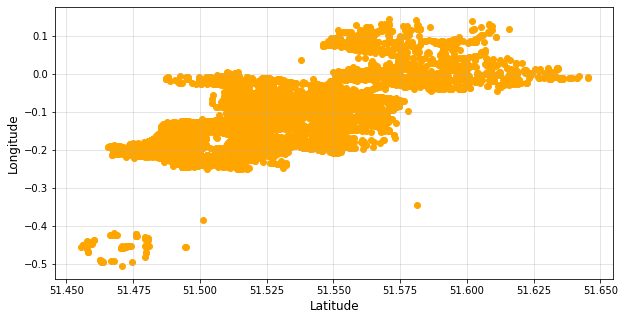

In [ ]:
#Scatter plot of Longitude/Latitude
plt.figure(figsize=(10,5))
plt.scatter(x='Latitude',y='Longitude',data=Accidents,c='orange')
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Longitude',fontsize=12)
plt.grid(alpha=0.4)

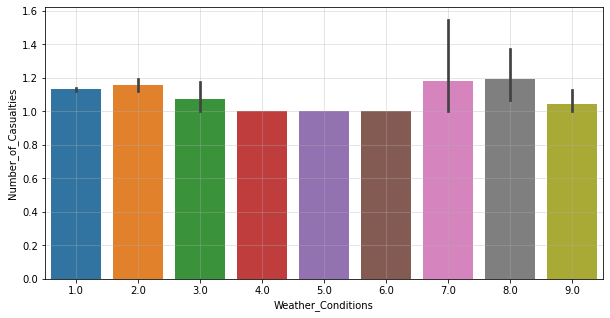

In [ ]:
plt.figure(figsize=(10,5))
plt.grid(alpha=0.2)
sns.barplot(x='Weather_Conditions',y='Number_of_Casualties',data=Accidents)
plt.grid(alpha=0.4)
plt.show()

<Figure size 720x1080 with 0 Axes>

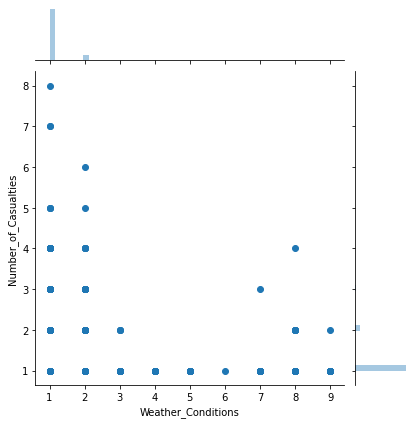

In [ ]:
plt.figure(figsize=(10,15))
sns.jointplot(x='Weather_Conditions',y='Number_of_Casualties',data=Accidents)

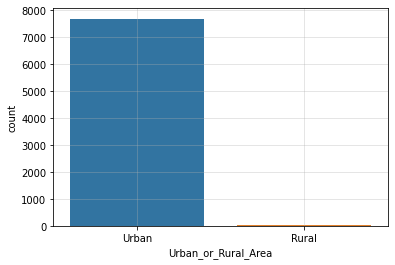

In [ ]:
ax=sns.countplot(x='Urban_or_Rural_Area',data=Accidents)
ax.set_xticklabels(['Urban','Rural','Unallocated'])
plt.grid(alpha=0.4)

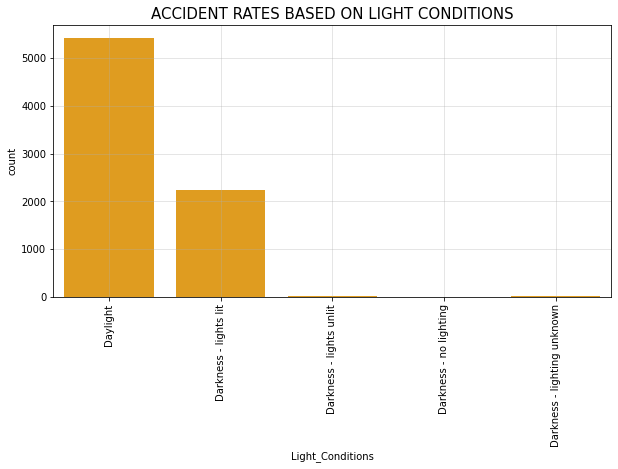

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Light_Conditions',data=Accidents,color='orange') 
ax.set_xticklabels(['Daylight','Darkness - lights lit',
                    'Darkness - lights unlit','Darkness - no lighting','Darkness - lighting unknown'])
plt.xticks(Rotation=90)
plt.title('ACCIDENT RATES BASED ON LIGHT CONDITIONS',fontsize=15)
plt.grid(alpha=0.4)
plt.show()

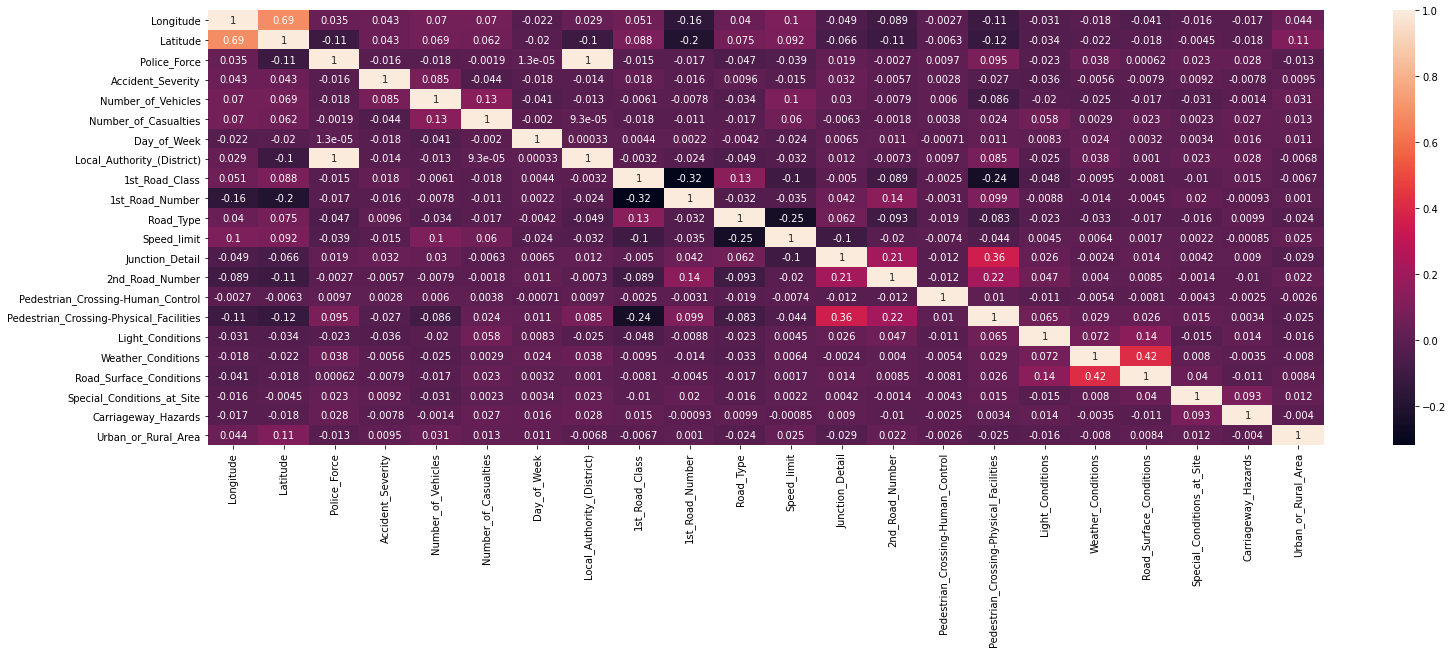

In [ ]:
correlation=Casualities.corr()
plt.figure(figsize=(25,8))
sns.heatmap(Correlation,annot=True)

<Figure size 432x288 with 0 Axes>

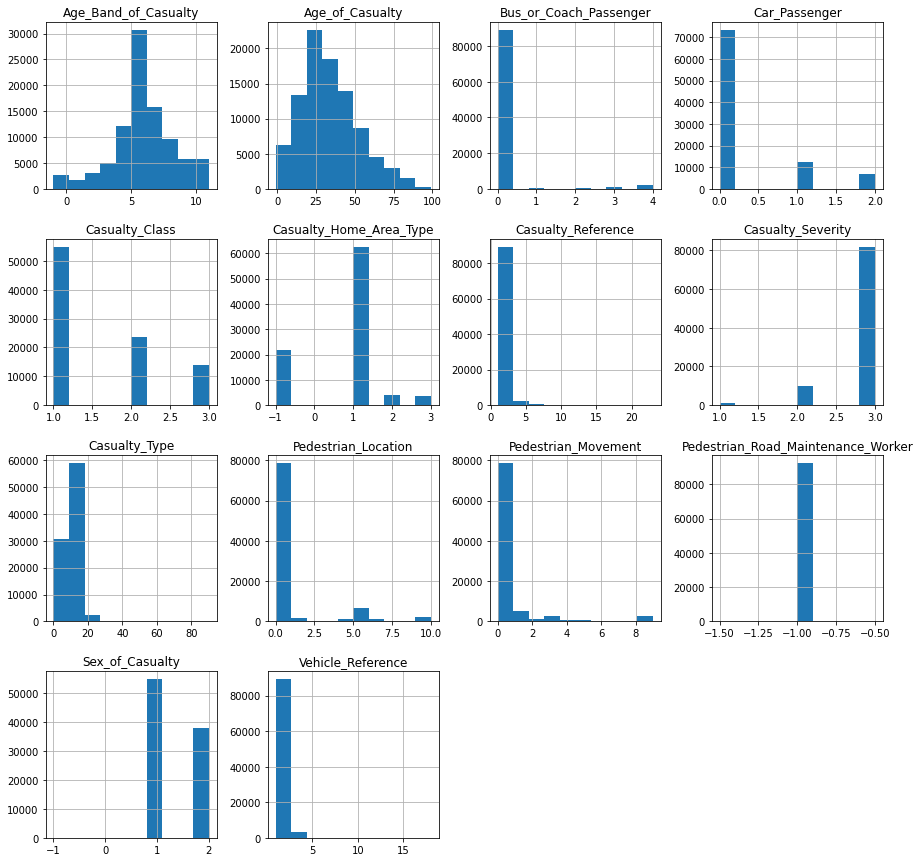

In [ ]:
plt.figure()
Casualities.hist(figsize=(15,15));

### The following plot clearly shows that most of the casualities suffered in accidents are mostly teenagers and youngsters around the age of 17-21.

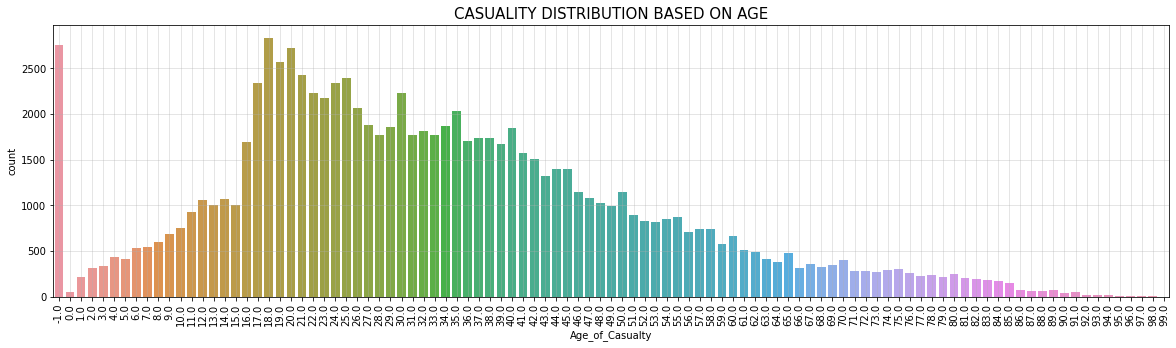

In [ ]:
#Distrubution of casualities based on age:
plt.figure(figsize=(20,5))
sns.countplot('Age_of_Casualty',data=Casualities)
plt.title('CASUALITY DISTRIBUTION BASED ON AGE', fontsize=15)
plt.xticks(rotation=90)
plt.grid(alpha=0.4)
plt.show()

### From the below plot it clearly indicates most of the casualities suffered are males from every age groups: 

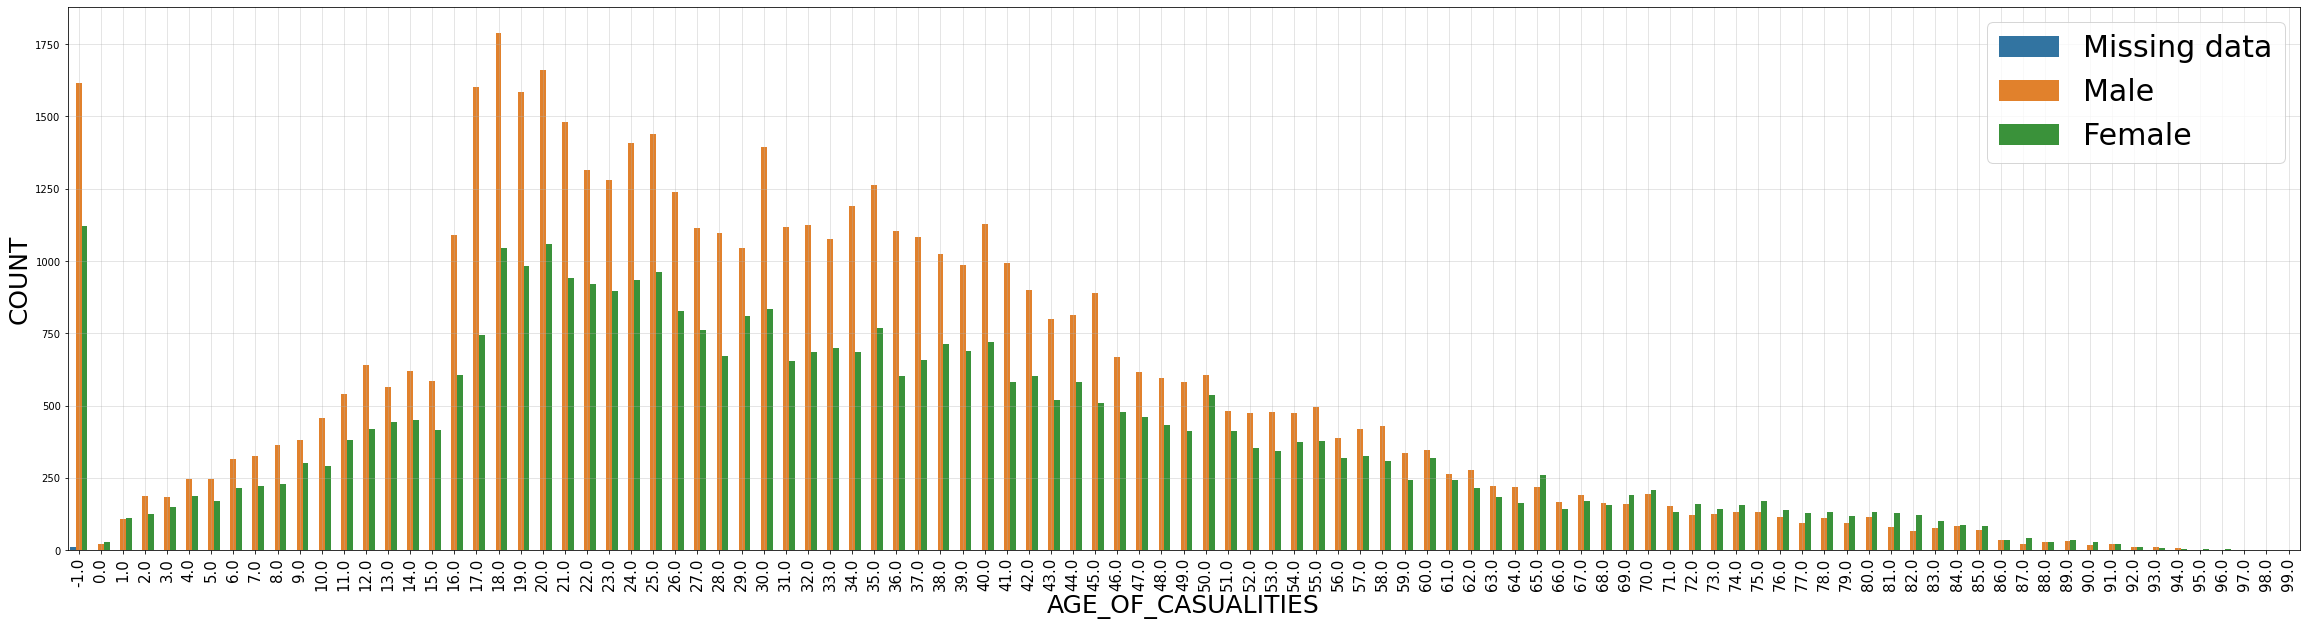

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot('Age_of_Casualty',hue='Sex_of_Casualty',data=Casualities)
plt.xticks(fontsize=15,rotation=90)
plt.legend(['Missing data','Male','Female'],prop={'size': 30}, loc=1)
plt.grid(alpha=0.4)
plt.xlabel('AGE_OF_CASUALITIES', fontsize=25)
plt.ylabel('COUNT', fontsize=25)
plt.show()

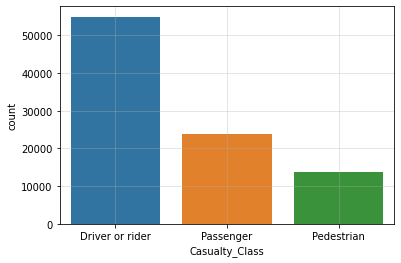

In [ ]:
plt.figure()
ax=sns.countplot('Casualty_Class', data=Casualities)
ax.set_xticklabels(['Driver or rider','Passenger','Pedestrian'])
plt.grid(alpha=0.4)
plt.show()

In [ ]:
Vehicles.head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1.0,1.0,3.0,1.0,37.0,7.0,2.0,1.0,1.0,0.0,0.0,-1.0,0.0,1.0
200501BS00002,1.0,1.0,2.0,1.0,37.0,7.0,3.0,0.0,0.0,0.0,4.0,-1.0,11.0,1.0
200501BS00003,2.0,1.0,1.0,1.0,62.0,9.0,3.0,0.0,0.0,0.0,0.0,-1.0,9.0,1.0
200501BS00004,1.0,1.0,3.0,1.0,30.0,6.0,3.0,5.0,2.0,0.0,0.0,-1.0,0.0,1.0
200501BS00005,1.0,1.0,1.0,1.0,49.0,8.0,3.0,0.0,0.0,0.0,0.0,-1.0,3.0,-1.0


In [ ]:
Vehicles.drop(['Vehicle_Reference',
       'Casualty_Reference', 'Casualty_Class', 'Sex_of_Casualty',
       'Age_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity',
       'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger',
       'Bus_or_Coach_Passenger', 'Pedestrian_Road_Maintenance_Worker',
       'Casualty_Type', 'Casualty_Home_Area_Type'], axis=1, inplace=True)

In [ ]:
Dataframe1=Accidents.merge(Casualities, right_index=True, left_index=True)
Dataframe2=Dataframe1.merge(Vehicles, right_index=True, left_index=True)
Dataframe2.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200501BS00001,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3.0,3218.0,6.0,30.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,37.0,7.0,2.0,1.0,1.0,0.0,0.0,-1.0,0.0,1.0
200501BS00002,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4.0,450.0,3.0,30.0,6.0,0.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,37.0,7.0,3.0,0.0,0.0,0.0,4.0,-1.0,11.0,1.0
200501BS00003,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5.0,0.0,6.0,30.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,62.0,9.0,3.0,0.0,0.0,0.0,0.0,-1.0,9.0,1.0
200501BS00004,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3.0,3220.0,6.0,30.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,30.0,6.0,3.0,5.0,2.0,0.0,0.0,-1.0,0.0,1.0
200501BS00005,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6.0,0.0,6.0,30.0,0.0,0.0,0.0,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,49.0,8.0,3.0,0.0,0.0,0.0,0.0,-1.0,3.0,-1.0


In [ ]:
Dataframe2.columns

Index(['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

### Accident severity distribution based on sex:

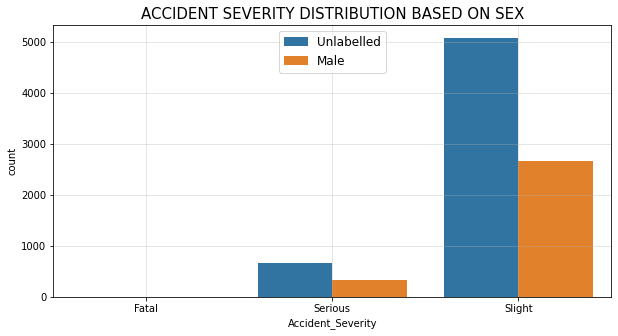

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity',hue='Sex_of_Casualty',data=Dataframe1)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.legend(['Unlabelled','Male','Female'],fontsize=12)
plt.title('ACCIDENT SEVERITY DISTRIBUTION BASED ON SEX', fontsize=15)
plt.grid(alpha=0.4)

### Accident severity distribution based on casuality class:

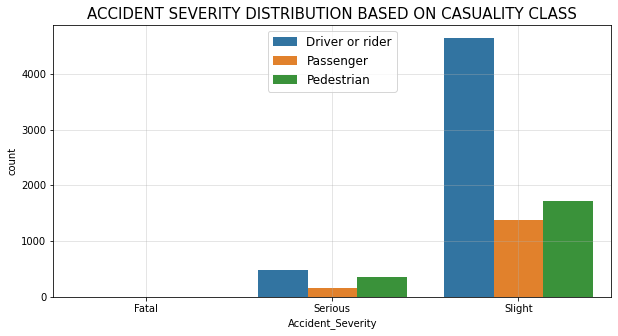

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity',hue='Casualty_Class',data=Dataframe1)
plt.legend(['Driver or rider','Passenger','Pedestrian'],fontsize=12)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.title('ACCIDENT SEVERITY DISTRIBUTION BASED ON CASUALITY CLASS', fontsize=15)
plt.grid(alpha=0.4)

### Accident Severity distribution based on Light conditions:

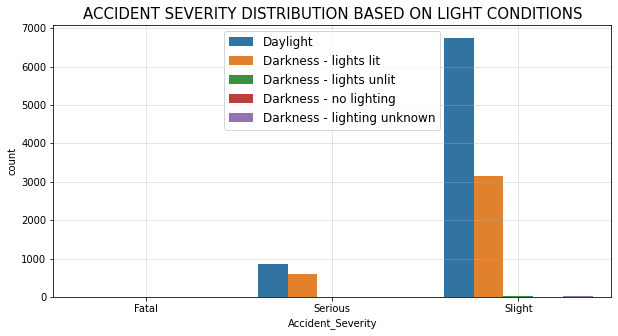

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity', hue='Light_Conditions', data=Dataframe2)
plt.legend(['Daylight','Darkness - lights lit','Darkness - lights unlit','Darkness - no lighting','Darkness - lighting unknown'],fontsize=12)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.title('ACCIDENT SEVERITY DISTRIBUTION BASED ON LIGHT CONDITIONS', fontsize=15)
plt.grid(alpha=0.4)

### Accident severity distribution based on road type

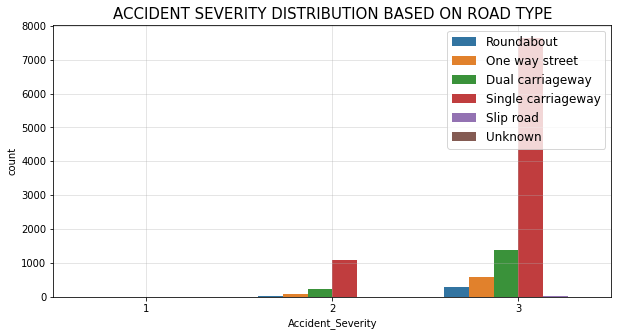

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('Accident_Severity', hue='Road_Type', data=Dataframe2)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.legend(['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road','Unknown'], fontsize=12)
plt.title('ACCIDENT SEVERITY DISTRIBUTION BASED ON ROAD TYPE', fontsize=15)
plt.grid(alpha=0.4)

<Figure size 720x360 with 0 Axes>

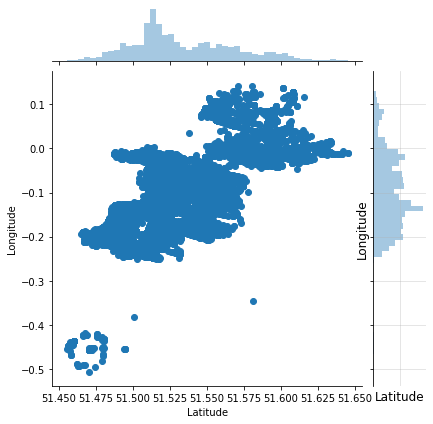

In [ ]:
#Scatter plot of Longitude/Latitude
plt.figure(figsize=(10,5))
sns.jointplot(x='Latitude',y='Longitude',kind = 'scatter',data=Dataframe2)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Longitude',fontsize=12)
plt.grid(alpha=0.4)

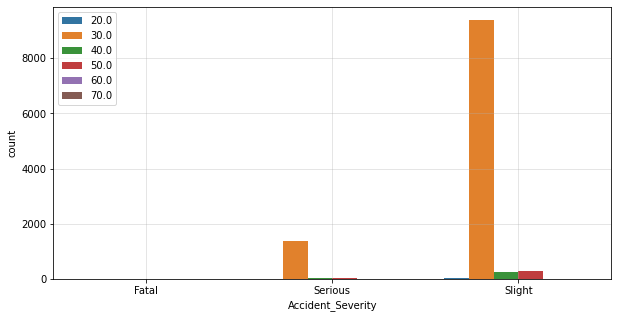

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity', hue='Speed_limit', data=Dataframe2)
plt.grid(alpha=0.4)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.legend(loc=2) 

In [ ]:
Dataframe3=Dataframe2[['Latitude','Longitude']]
locationlist = Dataframe3.values.tolist()
len(locationlist)
locationlist[7]
Dataframe3.shape

(11406, 2)

In [ ]:
import folium
from folium.plugins import MarkerCluster
m = folium.Map(location=[51.5085300,-0.1257400], tiles='openstreetmap', zoom_start=15)
marker_cluster = MarkerCluster().add_to(m)
for i in range(0,len(locationlist)):
    folium.CircleMarker(locationlist[i],radius = float(Dataframe2["Accident_Severity"].values[0]/1e7),
                        popup="Accident Severity : %s"%Dataframe2["Accident_Severity"].values[0],color="red",fill_color='pink').add_to(m)
m